# Hemodynamic correction

The hemodynamic correction is done by:

- High pass filtering the signal above 0.1 Hz and subtracting the mean
- Computing the regression coefficients between the 2 channels.
- Subtracting a scaled version of the temporal components of one channel to the other to obtain the corrected temporal components.


In [2]:
from wfield import *

localdisk = '/mnt/dual/temp_folder/CSP23_20200226/'
fs = 30

U = np.load(pjoin(localdisk,'U.npy'))
SVT = np.load(pjoin(localdisk,'SVT.npy'))

tstart = time.time()

SVT_470 = SVT[:,0::2]
t = np.arange(SVT.shape[1]) # interpolate the violet
from scipy.interpolate import interp1d
SVT_405 = interp1d(t[1::2],SVT[:,1::2],axis=1,
                    fill_value='extrapolate')(t[0::2])
SVTcorr, rcoeffs, T = hemodynamic_correction(U, 
                                             SVT_470, 
                                             SVT_405, 
                                             fs=fs,
                                             freq_lowpass=10)  

print('Done hemodynamic correction in {0} s '.format(time.time()-tstart))

np.save(pjoin(localdisk,'rcoeffs.npy'),rcoeffs)
np.save(pjoin(localdisk,'T.npy'),T)
np.save(pjoin(localdisk,'SVTcorr.npy'),SVTcorr)


Done hemodynamic correction in 79.62976098060608 s 


In [3]:
%gui qt5
# Prepare the interactive plot
from  wfield import *
localdisk = '/mnt/dual/temp_folder/CSP22_20200226/'

stack = SVDStack(U,SVTcorr)

In [4]:
# Run (this needs to be in a different cell than the above) 
plot = qtgraph_show_svd(stack)

#### Use the following for debugging

Skipping lowpass on the violet channel.


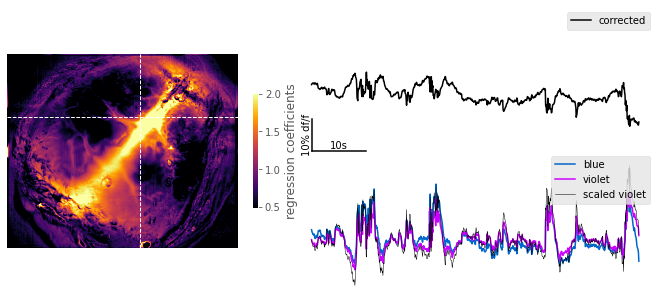

In [1]:

from wfield import np,pjoin
output_folder = '/mnt/dual/temp_folder/CSP22_20200226/'

from wfield.ncaas import dual_color_hemodymamic_correction

SVTcorr = dual_color_hemodymamic_correction(rcoeffs,
                                            SVT_470,
                                            SVT_405,
                                            U,
                                            T,
                                            frame_rate = frame_rate, 
                                            output_folder = output_folder);